# Importing Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [144]:
df = pd.read_csv('lead_1000_admission_done.csv')

In [145]:
df = df.sample(frac=1)

In [146]:
df.columns

Index(['id', 'leadinfo_id', 'childdetail_id', 'id-2', 'enquiry_no',
       'lead_relation', 'lead_name', 'lead_email_id', 'lead_income',
       'lead_contact_no',
       ...
       'system_generate_application_date', 'kbsc_appeared', 'grade_course_id',
       'other_detail-2', 'punch_in_date', 'admission_blocked',
       'admission_blocked_branch_id', 'admission_blocked_date',
       'system_generate_admission_blocked_date',
       'system_generate_admission_rejected_date'],
      dtype='object', length=165)

# Comparing Walk-in vs Admission Done

In [147]:
new_df = df[['walkin_completed','admission_completed']]

In [148]:
new_df

,walkin_completed,admission_completed
1696,False,False
1684,False,False
1837,False,False
1331,False,False
1599,True,False
...,...,...
1811,False,False
1402,True,False
1941,True,False
726,True,True


In [149]:
new_df = new_df.replace({True: 1, False: 0})

In [150]:
new_df

,walkin_completed,admission_completed
1696,0,0
1684,0,0
1837,0,0
1331,0,0
1599,1,0
...,...,...
1811,0,0
1402,1,0
1941,1,0
726,1,1


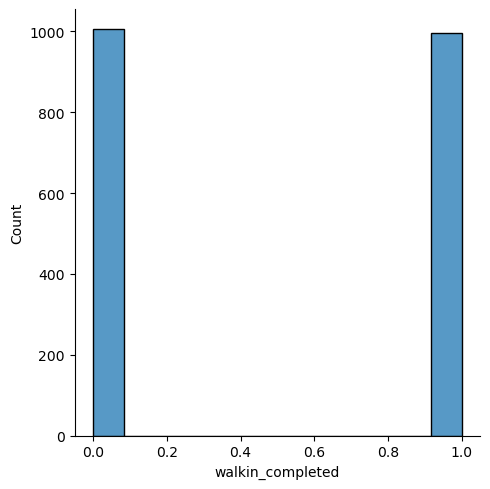

In [151]:
sns.displot(new_df['walkin_completed'])

In [152]:
new_df['walkin_completed'].sum() # total walkins done 

995

In [153]:
new_df[new_df['admission_completed']==0]['walkin_completed'].sum() # total walkins done and admission not done

172

In [154]:
new_df[new_df['admission_completed']==1]['walkin_completed'].sum() # total walkins done and admission done

823

In [155]:
new_df[(new_df['walkin_completed']==0) & (new_df['admission_completed']==1) ]['admission_completed'].sum() # admission done without walkins

177

In [156]:
new_df[new_df['walkin_completed']==1]['admission_completed'].sum() # admission done without walkins

823

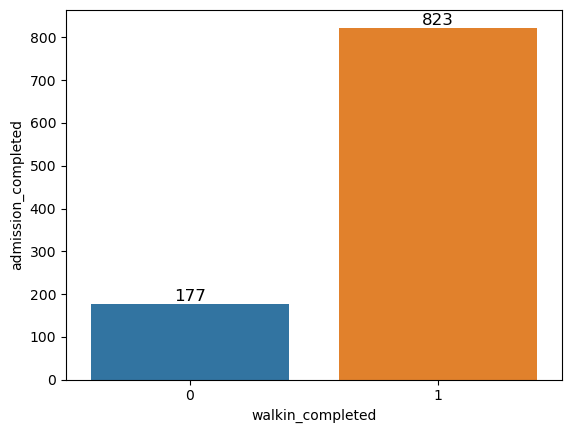

In [158]:
counts = new_df.groupby('walkin_completed')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='walkin_completed', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Comparing Application vs Admission Done

In [159]:
new_df = df[['application_completed','admission_completed']]

In [160]:
new_df

,application_completed,admission_completed
1696,False,False
1684,False,False
1837,False,False
1331,False,False
1599,True,False
...,...,...
1811,False,False
1402,False,False
1941,True,False
726,True,True


In [161]:
new_df = new_df.replace({True: 1, False: 0})

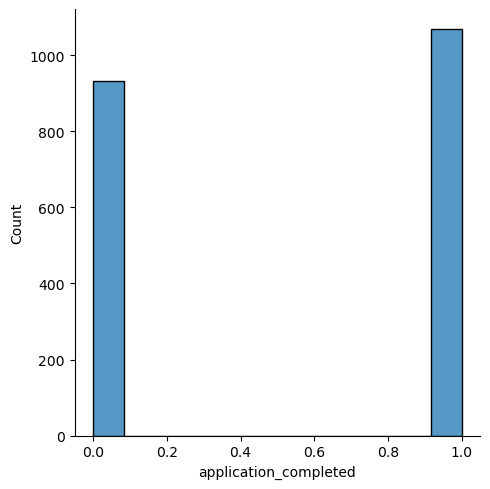

In [162]:
sns.displot(new_df['application_completed'])

In [163]:
new_df['application_completed'].sum() # total walkins done 

1068

In [164]:
new_df[new_df['application_completed']==0]['admission_completed'].sum() # total admission done without application

62

In [165]:
new_df[new_df['application_completed']==1]['admission_completed'].sum() # total application done and admission done

938

In [166]:
new_df[new_df['admission_completed']==0]['application_completed'].sum() # total applications done and admission not done

130

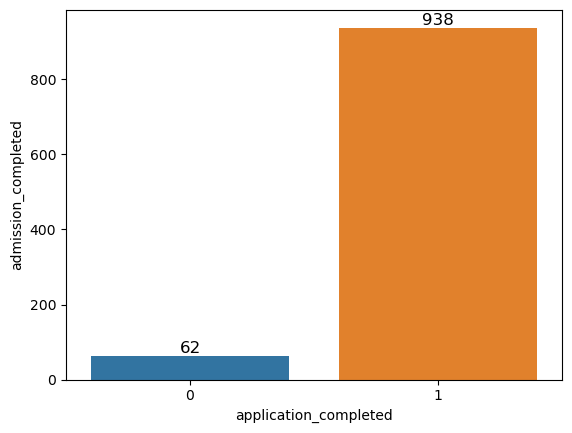

In [167]:
counts = new_df.groupby('application_completed')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='application_completed', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Comparing Pre School Tieup vs Admissions Done

In [170]:
new_df = df[['pre_school_tieup_id','admission_completed']]

In [171]:
new_df

,pre_school_tieup_id,admission_completed
1696,NaN,False
1684,NaN,False
1837,NaN,False
1331,NaN,False
1599,12595.0,False
...,...,...
1811,NaN,False
1402,7494.0,False
1941,802.0,False
726,14363.0,True


In [172]:
new_df['pre_school_tieup_id'] =  (~df['pre_school_tieup_id'].isna()).astype(int)

/tmp/ipykernel_115635/2509143973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['pre_school_tieup_id'] =  (~df['pre_school_tieup_id'].isna()).astype(int)


In [173]:
new_df = new_df.replace({True:1,False:0})

In [174]:
new_df

,pre_school_tieup_id,admission_completed
1696,0,0
1684,0,0
1837,0,0
1331,0,0
1599,1,0
...,...,...
1811,0,0
1402,1,0
1941,1,0
726,1,1


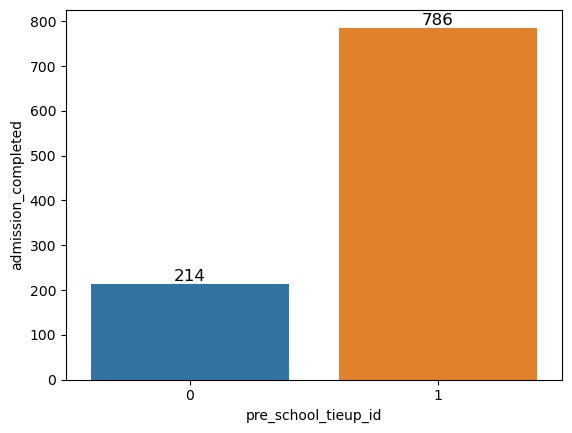

In [176]:
counts = new_df.groupby('pre_school_tieup_id')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='pre_school_tieup_id', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [177]:
new_df[new_df['pre_school_tieup_id']==1]['admission_completed'].sum() # total admission done with pre school tieup

786

In [178]:
new_df[new_df['pre_school_tieup_id']==0]['admission_completed'].sum() # total admission done without pre school tieup

214

# Comparing Registration vs Admission Done

In [179]:
new_df = df[['registration_completed','admission_completed']]

In [180]:
new_df

,registration_completed,admission_completed
1696,False,False
1684,False,False
1837,False,False
1331,False,False
1599,False,False
...,...,...
1811,False,False
1402,False,False
1941,False,False
726,True,True


In [181]:
new_df = new_df.replace({True:1,False:0})

In [182]:
new_df

,registration_completed,admission_completed
1696,0,0
1684,0,0
1837,0,0
1331,0,0
1599,0,0
...,...,...
1811,0,0
1402,0,0
1941,0,0
726,1,1


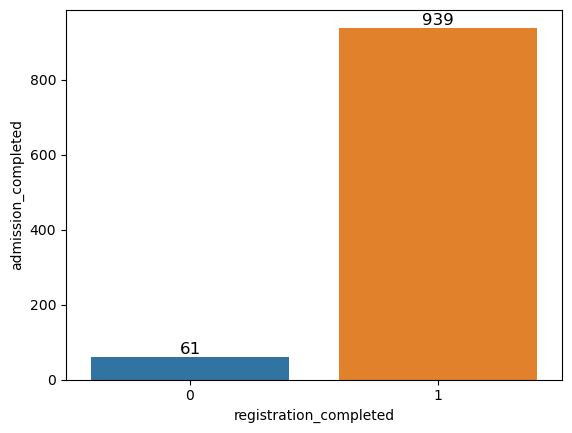

In [184]:
counts = new_df.groupby('registration_completed')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='registration_completed', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Comparing Call Done vs Admission 

In [185]:
new_df = df[['call_count','admission_completed']]

In [186]:
new_df

,call_count,admission_completed
1696,0,False
1684,0,False
1837,0,False
1331,0,False
1599,0,False
...,...,...
1811,0,False
1402,0,False
1941,0,False
726,5,True


In [188]:
new_df['call_count'].max()

26

In [189]:
new_df = new_df.replace({True:1,False:0})

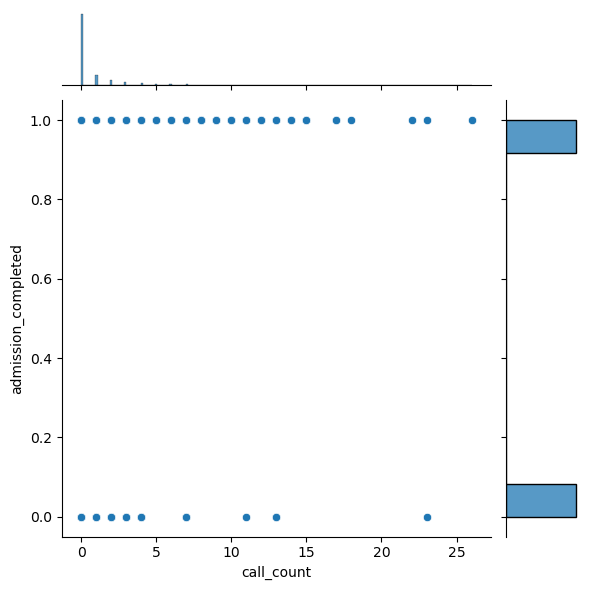

In [191]:
sns.jointplot(x='call_count',y='admission_completed',data=new_df)

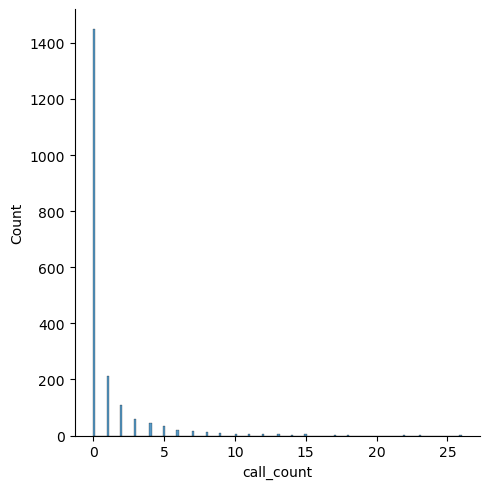

In [192]:
sns.displot(new_df['call_count'])

In [193]:
df['call_count'].unique()

array([ 0,  2,  1,  4,  3,  6,  8,  7, 12,  9,  5, 10, 17, 11, 23, 13, 15,
       14, 26, 18, 22])

In [196]:
new_df.groupby('call_count')['admission_completed'].sum().reset_index()

,call_count,admission_completed
0,0,550
1,1,152
2,2,84
3,3,51
4,4,42
5,5,34
6,6,21
7,7,14
8,8,13
9,9,8


In [198]:
new_df['admission_done_is_zero'] = (new_df['admission_completed'] == 0).astype(int)
new_df.groupby('call_count')['admission_done_is_zero'].sum().reset_index()

,call_count,admission_done_is_zero
0,0,898
1,1,59
2,2,25
3,3,7
4,4,4
5,5,0
6,6,0
7,7,3
8,8,0
9,9,0


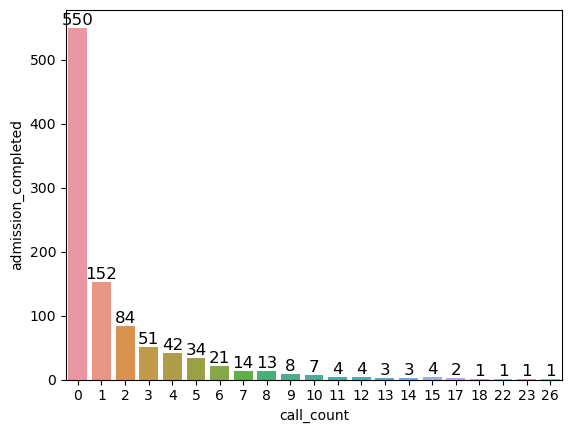

In [200]:
counts = new_df.groupby('call_count')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='call_count', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()